In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [25]:
# Function to generate and plot the data
def generate_regression_data(N, noise):
    # Generate regression data with a linear relationship
    X, y = make_regression(n_samples=N, n_features=1, noise=noise, random_state=42)
    return X, y

def plot_regression(N, noise):
    # Generate the data
    X, y = generate_regression_data(N, noise)
    # Create a figure
    plt.figure(figsize=(10, 4))
    # Create a scatter plot of X vs y to show the regression line relationship
    plt.scatter(X, y, c='g')
    plt.title('Regression Data Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.grid(True)
    # Show the plot
    plt.show()

# Create interactive widgets
N_slider = widgets.IntSlider(value=100, min=50, max=250, step=25, description='N')
noise_slider = widgets.FloatSlider(value=10, min=0, max=50, step=5, description='Noise')

# Use interact to create an interactive plot
interact(plot_regression, N=N_slider, noise=noise_slider)

# Extract dataset for future use
N_value = 50  # Number of samples
noise_value = 10  # Noise level
X, y = generate_regression_data(N=N_value, noise=noise_value)


interactive(children=(IntSlider(value=100, description='N', max=250, min=50, step=25), FloatSlider(value=10.0,…

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=5)
X_train.shape, X_test.shape

((45, 1), (5, 1))

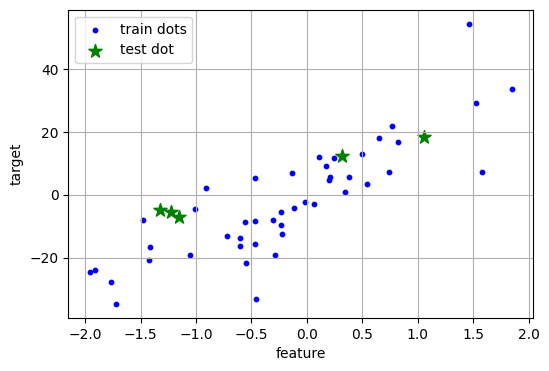

In [27]:
plt.figure(figsize=(6, 4))
#idx = 0
#test_dot = X_test[idx]
plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.grid()
plt.scatter(X_test, y_test, c='g', marker='*', s=100, label='test dot')
#plt.scatter(X_test[idx, 0], y_test[idx], c='g', marker='*', s=100, label='test dot')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend();

In [35]:
n_neighbors = 3
model = KNeighborsRegressor(n_neighbors=n_neighbors,
                            weights='distance')
model

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [36]:
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.5574794418247438

In [38]:
all_distances_list = []

# Loop over all test points
for idx, test_dot in enumerate(X_test):
    # Loop through the training data
    for i, train_dot in enumerate(X_train):
        # Calculate the distance and store it in the list
        all_distances_list.append({
            'test_idx': idx,
            'train_idx': i,
            'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # Euclidean distance
        })

# Convert the list of dictionaries to a DataFrame
all_distances = pd.DataFrame(all_distances_list)

# Display the distances DataFrame
display(all_distances)

,test_idx,train_idx,dst
0,0,0,2.686492
1,0,1,1.429707
2,0,2,1.717558
3,0,3,2.743874
4,0,4,2.800056
...,...,...,...
220,4,40,1.538031
221,4,41,0.228313
222,4,42,0.605941
223,4,43,2.039165


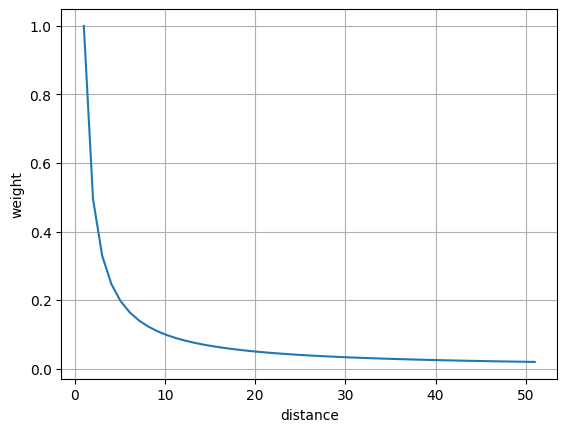

In [39]:
x = np.linspace(1, 51, 50)
plt.plot(x, 1/x)
plt.xlabel('distance')
plt.ylabel('weight')
plt.grid()

Using a weight of 1/d is not an ideal solution because the weight becomes infinitely large when d=0. In scikit-learn, this issue is handled by assigning a finite weight to such an object, while all other objects receive a weight of 0.

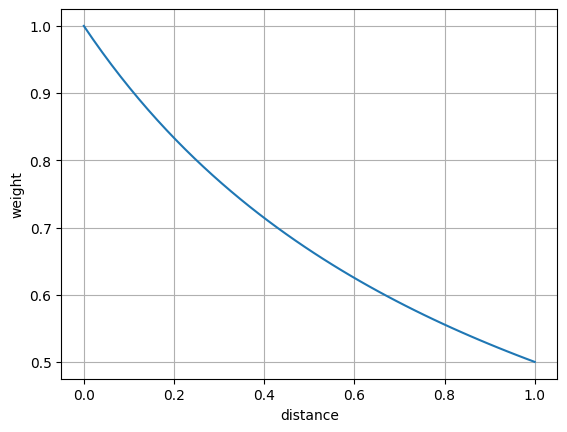

In [40]:
a = 1
x = np.linspace(0, 1, 50)
plt.plot(x, 1 / (x + a))
plt.xlabel('distance')
plt.ylabel('weight')
plt.grid();

In [41]:
def weight_new_distance(dists):
    weights = np.zeros(dists.shape)

    for i in range(dists.shape[1]):
        weights[:, i] = 1/(i+1)

    return weights

In [45]:
all_distances_list = []

# Loop over all test points
for idx, test_dot in enumerate(X_test):
    # Loop through the training data
    for i, train_dot in enumerate(X_train):
        # Calculate the distance and store its inverse (1/(distance+1)) in the list
        distance = np.linalg.norm(train_dot - test_dot, ord=2)  # Euclidean distance
        all_distances_list.append({
            'test_idx': idx,
            'train_idx': i,
            'dst': 1 / (distance + 1)  # Inverse of distance + 1
        })

# Convert the list of dictionaries to a DataFrame
all_distances = pd.DataFrame(all_distances_list)

# Display the distances DataFrame
display(all_distances)


,test_idx,train_idx,dst
0,0,0,0.271261
1,0,1,0.411572
2,0,2,0.367977
3,0,3,0.267103
4,0,4,0.263154
...,...,...,...
220,4,40,0.394006
221,4,41,0.814125
222,4,42,0.622688
223,4,43,0.329038


In [42]:
n_neighbors = 5
model = KNeighborsRegressor(n_neighbors=n_neighbors,
                            weights=weight_new_distance)

In [43]:
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.6875473435862869